In [1]:
pip install mlxtend 

Note: you may need to restart the kernel to use updated packages.


# movies dataset

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
# conda install -c conda-forge mlxtend

In [3]:
my_movies = pd.read_csv("C:/Users/kishore/Downloads/my_movies.csv")
my_movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
df=pd.get_dummies(my_movies)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


#min value=0.1

In [34]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V1_Sixth Sense, V2_LOTR1, V5_LOTR2, V3_Harry ..."
1393,0.1,"(V1_Sixth Sense, V2_LOTR1, V5_LOTR2, V3_Harry ..."
1394,0.1,"(V1_Sixth Sense, V2_LOTR1, V5_LOTR2, V3_Harry ..."
1395,0.1,"(V1_Sixth Sense, V2_LOTR1, V5_LOTR2, LOTR2, LO..."


In [35]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
64247,(LOTR1),"(V1_Sixth Sense, V2_LOTR1, V5_LOTR2, V3_Harry ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(Harry Potter1),"(V1_Sixth Sense, V2_LOTR1, V5_LOTR2, V3_Harry ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(Sixth Sense),"(V1_Sixth Sense, V2_LOTR1, V5_LOTR2, V3_Harry ...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64250,(Green Mile),"(V1_Sixth Sense, V2_LOTR1, V5_LOTR2, V3_Harry ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [36]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(Harry Potter1, Sixth Sense, LOTR1, V5_LOTR2)","(V3_Harry Potter1, Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33437,"(V4_Green Mile, Harry Potter1, LOTR1)","(Sixth Sense, V5_LOTR2, LOTR2, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(Sixth Sense, LOTR1, V2_LOTR1)","(V4_Green Mile, Harry Potter1, LOTR2, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(V4_Green Mile, LOTR1, V2_LOTR1)","(Harry Potter1, Sixth Sense, LOTR2, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33417,"(Harry Potter1, Sixth Sense, V2_LOTR1)","(V4_Green Mile, LOTR1, LOTR2, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33418,"(Harry Potter1, V4_Green Mile, V2_LOTR1)","(LOTR1, Sixth Sense, LOTR2, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33419,"(Sixth Sense, V4_Green Mile, V2_LOTR1)","(Harry Potter1, LOTR1, LOTR2, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33420,"(LOTR1, LOTR2, V5_LOTR2)","(Harry Potter1, Sixth Sense, V4_Green Mile, V2...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33421,"(Harry Potter1, LOTR2, V5_LOTR2)","(V4_Green Mile, Sixth Sense, LOTR1, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33422,"(Sixth Sense, LOTR2, V5_LOTR2)","(V4_Green Mile, Harry Potter1, LOTR1, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [37]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64247,(LOTR1),"(V1_Sixth Sense, V2_LOTR1, V5_LOTR2, V3_Harry ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(Harry Potter1),"(V1_Sixth Sense, V2_LOTR1, V5_LOTR2, V3_Harry ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(Sixth Sense),"(V1_Sixth Sense, V2_LOTR1, V5_LOTR2, V3_Harry ...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64250,(Green Mile),"(V1_Sixth Sense, V2_LOTR1, V5_LOTR2, V3_Harry ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [38]:
import matplotlib.pyplot as plt
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

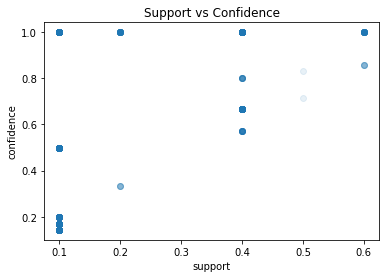

In [40]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.1)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show

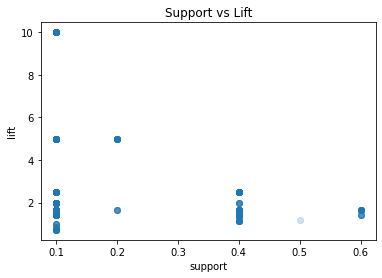

In [41]:
plt.scatter(rules['support'], rules['lift'], alpha=0.1)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

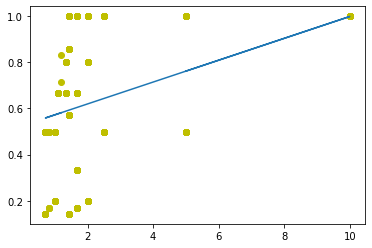

In [42]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

# min_value=0.2

In [43]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(V2_Patriot, Patriot, V3_Sixth Sense, Gladiato..."
77,0.4,"(V2_Patriot, V3_Sixth Sense, Gladiator, V1_Gla..."
78,0.4,"(V2_Patriot, Patriot, V3_Sixth Sense, V1_Gladi..."
79,0.4,"(V2_Patriot, Patriot, V3_Sixth Sense, Gladiato..."


In [44]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(Patriot),"(V2_Patriot, V3_Sixth Sense, Gladiator, V1_Gla...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
650,(V3_Sixth Sense),"(V2_Patriot, Patriot, Gladiator, V1_Gladiator,...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
651,(Gladiator),"(V2_Patriot, V3_Sixth Sense, Patriot, V1_Gladi...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
652,(V1_Gladiator),"(V2_Patriot, V3_Sixth Sense, Patriot, Gladiato...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [45]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
327,(V4_Green Mile),"(Sixth Sense, Green Mile, V1_Sixth Sense)",0.2,0.2,0.2,1.0,5.0,0.16,inf
176,"(Green Mile, V1_Sixth Sense)",(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
40,(V1_Sixth Sense),(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
41,(V4_Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
86,"(Sixth Sense, Green Mile)",(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
87,"(Sixth Sense, V1_Sixth Sense)",(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
90,(Green Mile),"(Sixth Sense, V1_Sixth Sense)",0.2,0.2,0.2,1.0,5.0,0.16,inf
91,(V1_Sixth Sense),"(Sixth Sense, Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
92,"(Sixth Sense, Green Mile)",(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
93,"(Sixth Sense, V4_Green Mile)",(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf


In [46]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(Patriot),"(V2_Patriot, V3_Sixth Sense, Gladiator, V1_Gla...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
650,(V3_Sixth Sense),"(V2_Patriot, Patriot, Gladiator, V1_Gladiator,...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
651,(Gladiator),"(V2_Patriot, V3_Sixth Sense, Patriot, V1_Gladi...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
652,(V1_Gladiator),"(V2_Patriot, V3_Sixth Sense, Patriot, Gladiato...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [47]:
import matplotlib.pyplot as plt
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

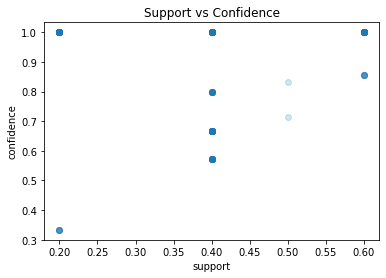

In [48]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.2)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show

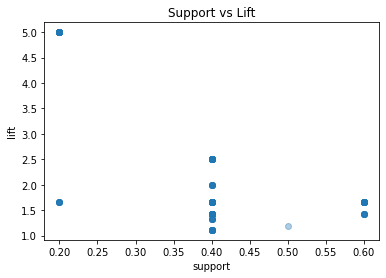

In [49]:
plt.scatter(rules['support'], rules['lift'], alpha=0.2)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

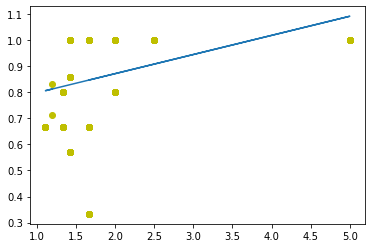

In [50]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

# min_value=0.3

In [21]:
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(V2_Patriot, Patriot, V3_Sixth Sense, Gladiato..."
59,0.4,"(V2_Patriot, V3_Sixth Sense, Gladiator, V1_Gla..."
60,0.4,"(V2_Patriot, Patriot, V3_Sixth Sense, V1_Gladi..."
61,0.4,"(V2_Patriot, Patriot, V3_Sixth Sense, Gladiato..."


In [22]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(Patriot),"(V2_Patriot, V3_Sixth Sense, Gladiator, V1_Gla...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
598,(V3_Sixth Sense),"(V2_Patriot, Patriot, Gladiator, V1_Gladiator,...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
599,(Gladiator),"(V2_Patriot, V3_Sixth Sense, Patriot, V1_Gladi...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
600,(V1_Gladiator),"(V2_Patriot, V3_Sixth Sense, Patriot, Gladiato...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [23]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
249,"(Patriot, Sixth Sense, V1_Gladiator)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
414,"(Sixth Sense, V1_Gladiator)","(Patriot, V3_Sixth Sense, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
422,"(V2_Patriot, Sixth Sense, Gladiator, Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
502,"(V3_Sixth Sense, V1_Gladiator)","(V2_Patriot, Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
552,"(V2_Patriot, V3_Sixth Sense, Gladiator, V1_Gla...","(Patriot, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
551,"(V2_Patriot, Sixth Sense, Patriot, V1_Gladiator)","(V3_Sixth Sense, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
416,(V3_Sixth Sense),"(Patriot, Sixth Sense, Gladiator, V1_Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
550,"(V2_Patriot, Sixth Sense, Gladiator, Patriot)","(V3_Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
410,"(V3_Sixth Sense, V1_Gladiator)","(Patriot, Sixth Sense, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
555,"(V2_Patriot, Sixth Sense, Gladiator, V1_Gladia...","(Patriot, V3_Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf


In [24]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(Patriot),"(V2_Patriot, V3_Sixth Sense, Gladiator, V1_Gla...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
598,(V3_Sixth Sense),"(V2_Patriot, Patriot, Gladiator, V1_Gladiator,...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
599,(Gladiator),"(V2_Patriot, V3_Sixth Sense, Patriot, V1_Gladi...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
600,(V1_Gladiator),"(V2_Patriot, V3_Sixth Sense, Patriot, Gladiato...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [32]:
import matplotlib.pyplot as plt
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

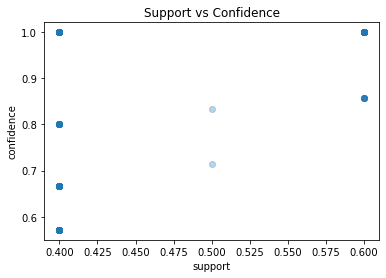

In [29]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.3)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show

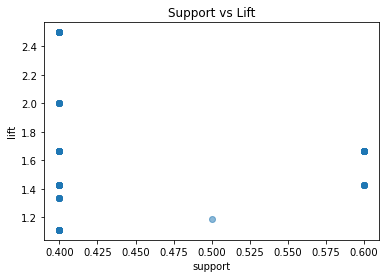

In [30]:
plt.scatter(rules['support'], rules['lift'], alpha=0.3)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

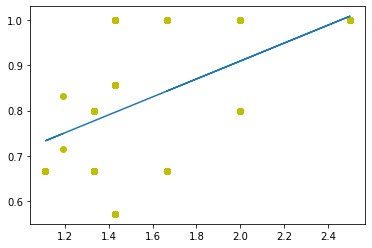

In [33]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

# Book dataset

In [53]:
book = pd.read_csv("C:/Users/kishore/Downloads/book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [54]:
df=pd.get_dummies(book)
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [55]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [56]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [57]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
79,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
99,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
94,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [58]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


<function matplotlib.pyplot.show(close=None, block=None)>

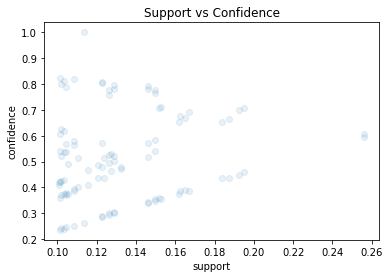

In [61]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.1)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show

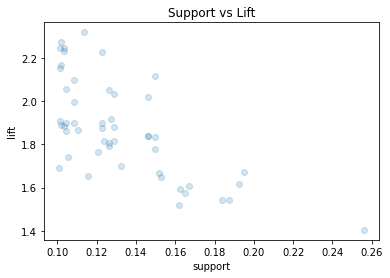

In [62]:
plt.scatter(rules['support'], rules['lift'], alpha=0.1)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

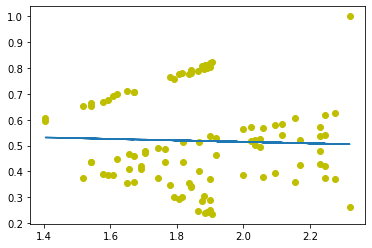

In [63]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

# min_value=0.2

In [64]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [65]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [66]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [67]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


<function matplotlib.pyplot.show(close=None, block=None)>

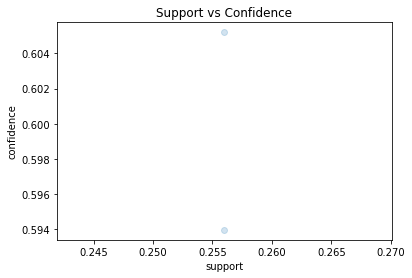

In [68]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.2)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show

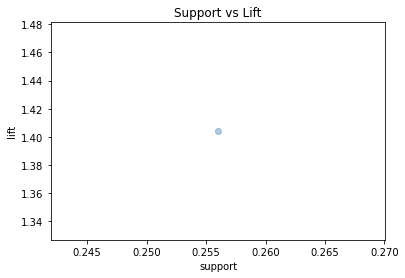

In [69]:
plt.scatter(rules['support'], rules['lift'], alpha=0.2)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


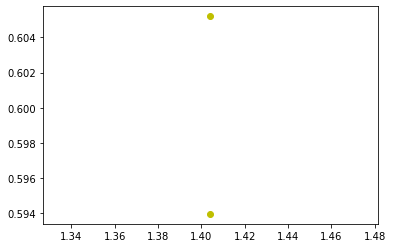

In [70]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))